In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [37]:
#Load the dataset from a CSV file named sample_dataset.csv into a Pandas DataFrame.
#Display the first few rows of the dataset.

In [38]:
df = pd.read_csv('sample_dataset.csv')
print(df.head())

   Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0  FlowerA  
1  FlowerA  
2  FlowerA  
3  FlowerA  
4  FlowerA  


In [39]:
#Generate summary statistics for this dataset. What are the mean and standard deviation of the Sepal Length?

In [40]:
df.describe()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
count,15.000000,15.00000,15.000000,15.000000
mean,5.906667,3.06000,3.873333,1.246667
std,0.873798,0.31803,1.891887,0.829687
min,4.600000,2.30000,1.300000,0.200000
25%,5.050000,2.95000,1.450000,0.200000
50%,6.300000,3.10000,4.600000,1.500000
75%,6.500000,3.20000,5.350000,1.850000
max,7.100000,3.60000,6.000000,2.500000


In [41]:
mean_sepal_length = df['Sepal Length (cm)'].mean()
std_sepal_length = df['Sepal Length (cm)'].std()
print("Mean Sepal Length: ",mean_sepal_length)
print("Standard Deviation Sepal Length: ",std_sepal_length)

Mean Sepal Length:  5.906666666666666
Standard Deviation Sepal Length:  0.8737984948051866


In [42]:
#3.Check for any missing values in the dataset. How would you handle them if there were any?

In [43]:
print("Checking for missing values:")
print(df.isnull().sum())

Checking for missing values:
Sepal Length (cm)    0
Sepal Width (cm)     0
Petal Length (cm)    0
Petal Width (cm)     0
Species              0
dtype: int64


In [44]:
# Convert the species labels to numerical values using a mapping dictionary.

In [45]:
species_mapping = {'FlowerA': 0, 'FlowerB': 1, 'FlowerC': 2}
df['Species'] = df['Species'].map(species_mapping)
print("Dataset with numerical species labels:")
print(df.head())

Dataset with numerical species labels:
   Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [46]:

#  Split the dataset into training and testing sets with 70% training data and 30% testing data. Ensure that the split is stratified based on the species.

In [47]:
X = df.drop('Species', axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
# print("Training and testing data split:")
# print("Training set size: ",X_train.shape[0])
# print("Testing set size: ",X_test.shape[0])

In [48]:
#  Train a decision tree classifier on the training data. What parameters would you use for the decision tree?

In [49]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [50]:

# Visualize the trained decision tree.

In [54]:
feature_names = X.columns.tolist()

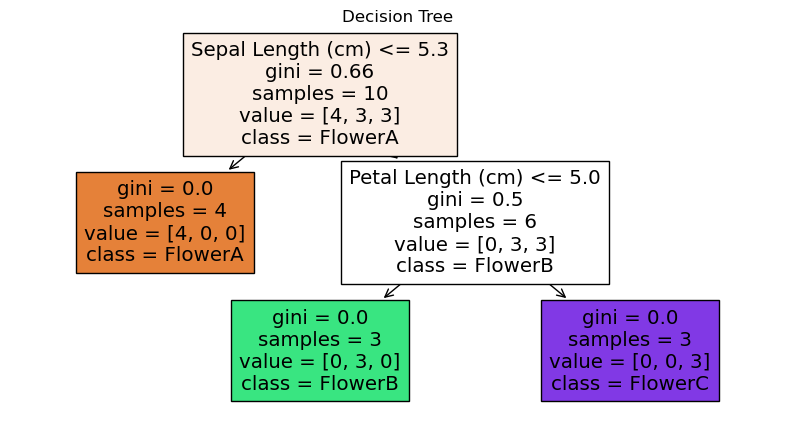

In [55]:
plt.figure(figsize=(10, 5))
tree.plot_tree(clf, feature_names=feature_names, class_names=list(species_mapping.keys()), filled=True)
plt.title("Decision Tree")
plt.show()

In [52]:
##  Predict the species for the testing data and compute the accuracy.

In [35]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the decision tree classifier: ",accuracy)

Accuracy of the decision tree classifier:  1.0
